In [1]:
import pandas as pd
import numpy as np

import altair as alt
import seaborn as sns

In [2]:
from trading_bot.agent import Agent

model_name = 't-dqn-TSLA_30'
test_stock = 'new_data/AAPL_2022.csv'
window_size = 10
debug = False

agent = Agent(window_size, pretrained=True, model_name=model_name)

/Users/victorli/miniconda3/envs/trading-bot/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/victorli/miniconda3/envs/trading-bot/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/victorli/miniconda3/envs/trading-bot/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/victorli/min

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2022-12-07 11:35:57.429986: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [3]:
# read csv into dataframe
df = pd.read_csv(test_stock)
# filter out the desired features
df = df[['Date', 'Adj Close']]
# rename feature column names
df = df.rename(columns={'Adj Close': 'actual', 'Date': 'date'})
# convert dates from object to DateTime type
dates = df['date']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['date'] = dates

df.head()

,date,actual
0,2022-01-03,180.959747
1,2022-01-04,178.663071
2,2022-01-05,173.910660
3,2022-01-06,171.007523
4,2022-01-07,171.176529


In [23]:
import logging
import coloredlogs
from trading_bot.agent import Agent

from trading_bot.utils import show_eval_result, switch_k_backend_device, get_stock_data
from trading_bot.methods import evaluate_model

coloredlogs.install(level='CRITICAL')
switch_k_backend_device()

test_data = get_stock_data(test_stock)
initial_offset = test_data[1] - test_data[0]

test_result, history = evaluate_model(agent, test_data, window_size, debug)
show_eval_result(model_name, test_result, initial_offset)


In [58]:
def get_return(model_name = 't-dqn-TSLA_30', test_stock = "AAPL"):
    test_stock = 'new_data/' + test_stock + '_2022.csv'
    window_size = 10
    debug = False
    if model_name == "random":
        agent = Agent(window_size, pretrained=True, strategy="uniform-rand")
    else:
        agent = Agent(window_size, pretrained=True, model_name=model_name)
    # read csv into dataframe
    df = pd.read_csv(test_stock)
    # filter out the desired features
    df = df[['Date', 'Adj Close']]
    # rename feature column names
    df = df.rename(columns={'Adj Close': 'actual', 'Date': 'date'})
    # convert dates from object to DateTime type
    dates = df['date']
    dates = pd.to_datetime(dates, infer_datetime_format=True)
    df['date'] = dates
    coloredlogs.install(level='DEBUG')
    switch_k_backend_device()

    test_data = get_stock_data(test_stock)
    initial_offset = test_data[1] - test_data[0]

    test_result, history = evaluate_model(agent, test_data, window_size, debug)
    return test_result, history

In [39]:
TSLA_randoms = [get_return("random", "TSLA") for _ in range(10)]
# QQQ_randoms = [get_return("random", "QQQ") for _ in range(10)]
np.mean(TSLA_randoms), np.std(TSLA_randoms)

2022-12-07 17:03:59 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:04:00 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:04:00 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:04:00 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:04:00 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:04:00 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:04:00 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:04:00 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:04:01 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:04:01 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU


(-4966.445124900003, 3119.3230283330654)

In [7]:
np.mean(TSLA_randoms), np.std(TSLA_randoms)

(-7210.864861800005, 4945.166205299557)

In [17]:
AAPL_randoms = [get_return("random", "AAPL") for _ in range(10)]
np.mean(AAPL_randoms), np.std(AAPL_randoms)

2022-12-07 11:36:37 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 11:36:37 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 11:36:37 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 11:36:37 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 11:36:37 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 11:36:38 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 11:36:38 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 11:36:38 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 11:36:38 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 11:36:38 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


(-1169.1377924000014, 570.6643893535987)

In [45]:
QQQ_randoms = [get_return("random", "QQQ") for _ in range(10)]
np.mean(QQQ_randoms), np.std(QQQ_randoms)

2022-12-07 17:07:44 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:07:44 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:07:44 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:07:45 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:07:45 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:07:45 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:07:45 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:07:45 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:07:45 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:07:45 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU


(-3975.4881386999987, 2733.0886825635343)

In [25]:
d = {}
for dataset in ["QQQ", "TSLA", "AAPL"]:
    for model in ["dqn-TSLA", "t-dqn-TSLA", "double-dqn-TSLA", "t-dqn-AAPL", "t-dqn-QQQ"]:
        for i in range(10, 60, 10):
            coloredlogs.install(level='CRITICAL')
            ret = get_return(model + "_" + str(i), dataset)
            d[(model, i, dataset)] = ret
            print(i, dataset, model, ret)

2022-12-07 11:47:07 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 QQQ dqn-TSLA 0


2022-12-07 11:47:15 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 QQQ dqn-TSLA -588.9582270000005


2022-12-07 11:47:24 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 QQQ dqn-TSLA -166.47381800000028


2022-12-07 11:47:32 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 QQQ dqn-TSLA 0


2022-12-07 11:47:41 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 QQQ dqn-TSLA 0


2022-12-07 11:47:50 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 QQQ t-dqn-TSLA -5832.938130000003


2022-12-07 11:48:00 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 QQQ t-dqn-TSLA -219.40308799999934


2022-12-07 11:48:10 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 QQQ t-dqn-TSLA 3.389739000000361


2022-12-07 11:48:20 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 QQQ t-dqn-TSLA 0


2022-12-07 11:48:31 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 QQQ t-dqn-TSLA 0


2022-12-07 11:48:42 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 QQQ double-dqn-TSLA -744.5490239999991


2022-12-07 11:48:53 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 QQQ double-dqn-TSLA 0


2022-12-07 11:49:05 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 QQQ double-dqn-TSLA 0


2022-12-07 11:49:18 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 QQQ double-dqn-TSLA 0


2022-12-07 11:49:30 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 QQQ double-dqn-TSLA 0


2022-12-07 11:49:43 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 QQQ t-dqn-AAPL -710.9791220000022


2022-12-07 11:49:57 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 QQQ t-dqn-AAPL -7974.839426999995


2022-12-07 11:50:10 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 QQQ t-dqn-AAPL -9960.382602999973


2022-12-07 11:50:25 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 QQQ t-dqn-AAPL -15401.017671999996


2022-12-07 11:50:39 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 QQQ t-dqn-AAPL 2089.2887640000035


2022-12-07 11:50:54 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 QQQ t-dqn-QQQ -6602.084104000012


2022-12-07 11:51:10 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 QQQ t-dqn-QQQ -10207.534014999988


2022-12-07 11:51:26 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 QQQ t-dqn-QQQ -14084.06378900001


2022-12-07 11:51:42 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 QQQ t-dqn-QQQ 802.8413460000033


2022-12-07 11:51:59 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 QQQ t-dqn-QQQ -203.32366099999973


2022-12-07 11:52:16 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 TSLA dqn-TSLA 0


2022-12-07 11:52:33 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 TSLA dqn-TSLA -492.9861139999996


2022-12-07 11:52:52 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 TSLA dqn-TSLA -407.6066880000003


2022-12-07 11:53:10 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 TSLA dqn-TSLA 0


2022-12-07 11:53:29 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 TSLA dqn-TSLA 0


2022-12-07 11:53:48 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 TSLA t-dqn-TSLA -5510.3764599999995


2022-12-07 11:54:07 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 TSLA t-dqn-TSLA -1315.9666550000002


2022-12-07 11:54:27 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 TSLA t-dqn-TSLA 83.97006600000003


2022-12-07 11:54:48 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 TSLA t-dqn-TSLA 0


2022-12-07 11:55:09 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 TSLA t-dqn-TSLA 0


2022-12-07 11:55:31 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 TSLA double-dqn-TSLA -336.7500529999985


2022-12-07 11:55:53 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 TSLA double-dqn-TSLA 0


2022-12-07 11:56:15 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 TSLA double-dqn-TSLA 0


2022-12-07 11:56:37 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 TSLA double-dqn-TSLA 0


2022-12-07 11:57:00 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 TSLA double-dqn-TSLA 0


2022-12-07 11:57:23 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 TSLA t-dqn-AAPL -1110.995992999997


2022-12-07 11:57:47 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 TSLA t-dqn-AAPL 243.88403900000364


2022-12-07 11:58:12 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 TSLA t-dqn-AAPL -2383.8629099999966


2022-12-07 11:58:37 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 TSLA t-dqn-AAPL -2953.7419340000038


2022-12-07 11:59:03 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 TSLA t-dqn-AAPL 373.1366349999993


2022-12-07 11:59:29 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 TSLA t-dqn-QQQ -7492.24951700001


2022-12-07 11:59:56 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 TSLA t-dqn-QQQ -5493.248586999999


2022-12-07 12:00:24 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 TSLA t-dqn-QQQ -4701.171606000007


2022-12-07 12:00:51 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 TSLA t-dqn-QQQ -410.903018


2022-12-07 12:01:18 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 TSLA t-dqn-QQQ -363.70002099999977


2022-12-07 12:01:47 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 AAPL dqn-TSLA 0


2022-12-07 12:02:16 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 AAPL dqn-TSLA -92.99189299999904


2022-12-07 12:02:46 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 AAPL dqn-TSLA -77.68905199999989


2022-12-07 12:03:16 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 AAPL dqn-TSLA 0


2022-12-07 12:03:46 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 AAPL dqn-TSLA 0


2022-12-07 12:04:17 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 AAPL t-dqn-TSLA -1435.5902230000006


2022-12-07 12:04:48 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 AAPL t-dqn-TSLA -130.985973


2022-12-07 12:05:20 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 AAPL t-dqn-TSLA -141.72960599999996


2022-12-07 12:05:52 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 AAPL t-dqn-TSLA 0


2022-12-07 12:06:25 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 AAPL t-dqn-TSLA 0


2022-12-07 12:06:58 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 AAPL double-dqn-TSLA 986.4808059999982


2022-12-07 12:07:32 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 AAPL double-dqn-TSLA 0


2022-12-07 12:08:06 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 AAPL double-dqn-TSLA 0


2022-12-07 12:08:40 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 AAPL double-dqn-TSLA 0


2022-12-07 12:09:16 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 AAPL double-dqn-TSLA 0


2022-12-07 12:09:52 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 AAPL t-dqn-AAPL 77.11716999999928


2022-12-07 12:10:29 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 AAPL t-dqn-AAPL -2128.687036000001


2022-12-07 12:11:06 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 AAPL t-dqn-AAPL -1506.4735659999994


2022-12-07 12:11:43 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 AAPL t-dqn-AAPL -4109.571187999999


2022-12-07 12:12:21 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 AAPL t-dqn-AAPL 1132.2992560000007


2022-12-07 12:13:01 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


10 AAPL t-dqn-QQQ -393.341292000002


2022-12-07 12:13:41 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


20 AAPL t-dqn-QQQ 223.63701199999863


2022-12-07 12:14:23 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


30 AAPL t-dqn-QQQ -2354.894584999999


2022-12-07 12:15:05 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


40 AAPL t-dqn-QQQ 51.48926299999988


2022-12-07 12:15:47 victors-mbp-16.lan root[22603] DEBUG switching to TensorFlow for CPU


50 AAPL t-dqn-QQQ 117.35112299999994


In [59]:
ret, history = get_return("t-dqn-AAPL" + "_" + "50", "AAPL")

2022-12-07 17:20:01 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU


In [98]:
"""
AAPL:
1. 30 AAPL t-dqn-TSLA -141.72960599999996
2. 20 AAPL t-dqn-QQQ 223.63701199999863
3. 50 AAPL t-dqn-AAPL 1132.2992560000007
"""
_, history_2 = get_return("t-dqn-QQQ" + "_" + "20", "AAPL")
_, history_3 = get_return("t-dqn-TSLA" + "_" + "30", "AAPL")
_, history_4 = get_return("random", "AAPL")

2022-12-07 17:38:54 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:39:36 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU
2022-12-07 17:39:41 Victors-MacBook-Pro-16.local root[22603] DEBUG switching to TensorFlow for CPU


In [61]:
history

[(180.959747, 'HOLD'),
 (178.663071, 'HOLD'),
 (173.91066, 'HOLD'),
 (171.007523, 'HOLD'),
 (171.17652900000002, 'BUY', 7),
 (171.196426, 'BUY', 9),
 (174.069748, 'SELL', 5),
 (174.51713600000002, 'SELL', 3),
 (171.196426, 'SELL', 5),
 (172.07135, 'SELL', 3),
 (168.820206, 'BUY', 9),
 (165.27079799999998, 'SELL', 5),
 (163.56073, 'SELL', 4),
 (161.472855, 'BUY', 9),
 (160.687393, 'SELL', 5),
 (158.858017, 'BUY', 9),
 (158.76853899999998, 'BUY', 9),
 (158.301254, 'BUY', 9),
 (169.347137, 'BUY', 9),
 (173.771454, 'BUY', 9),
 (173.602463, 'BUY', 9),
 (174.825333, 'SELL', 5),
 (171.902298, 'SELL', 1),
 (171.613632, 'SELL', 5),
 (170.88691699999998, 'SELL', 5),
 (174.042633, 'SELL', 5),
 (175.486099, 'SELL', 5),
 (171.344833, 'SELL', 5),
 (167.88050800000002, 'SELL', 5),
 (168.11944599999998, 'SELL', 5),
 (172.01181, 'BUY', 7),
 (171.772903, 'SELL', 5),
 (168.11944599999998, 'SELL', 5),
 (166.546555, 'SELL', 5),
 (163.57998700000002, 'SELL', 4),
 (159.349121, 'BUY', 9),
 (162.007095, 'BUY',

In [101]:
def visualize(df, history, history_2, history_3, history_4, title="trading session"):
    # add history to dataframe
    position = [history[0][0]] + [x[0] for x in history]
    actions = ['HOLD'] + [x[1] for x in history]
    actions_2 = ['HOLD'] + [x[1] for x in history_2]
    actions_3 = ['HOLD'] + [x[1] for x in history_3]
    actions_4 = ['HOLD'] + [x[1] for x in history_4]
    shares = [0]
    for x in history:
        if len(x) == 2:
            shares.append('0')
        else:
            shares.append(str(x[2]))
    df['position'] = position
    df['action'] = actions
    df['action_2'] = actions_2
    df['action_3'] = actions_3
    df['action_4'] = actions_4
    df['shares'] = shares
    # print(df)
    
    # specify y-axis scale for stock prices
    scale = alt.Scale(domain=(min(min(df['actual']), min(df['position'])) - 50, max(max(df['actual']), max(df['position'])) + 50), clamp=True)
    
    # plot a line chart for stock positions
    actual = alt.Chart(df).mark_line(
        color='green',
        opacity=0.5
    ).encode(
        x='date:T',
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale)
    ).interactive(
        bind_y=False
    )
    
    # plot the BUY and SELL actions as points
    points = alt.Chart(df).transform_filter(
        alt.datum.action != 'HOLD'
    ).mark_point(
        filled=True
    ).encode(
        x=alt.X('date:T', axis=alt.Axis(title='Date')),
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
        color='action'
    ).interactive(bind_y=False)

    points_2 = alt.Chart(df).transform_filter(
        alt.datum.action != 'HOLD'
    ).mark_point(
        filled=True
    ).encode(
        x=alt.X('date:T', axis=alt.Axis(title='Date')),
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
        color='action_2'
    ).interactive(bind_y=False)

    # texts = alt.Chart(df).transform_filter(
    #     alt.datum.action != 'HOLD'
    # ).mark_text(
    #     # align='left',
    #     # baseline='middle',
    #     dy=-10
    # ).encode(
    #     x=alt.X('date:T', axis=alt.Axis(title='Date')),
    #     y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
    #     text='shares'
    # ).interactive(bind_y=False)

    # merge the two charts
    chart = alt.layer(actual, points, points_2, title=title).properties(height=300, width=1000)
    
    return chart

In [102]:
chart = visualize(df, history, history_2, history_3, history_4, title="Buy/Sell visualiztion on AAPL")
chart

alt.LayerChart(...)

TSLA
1. 30 TSLA dqn-TSLA -407.6066880000003
2. 30 TSLA t-dqn-TSLA 83.97006600000003
3. 10 TSLA double-dqn-TSLA -336.7500529999985
4. 50 TSLA t-dqn-AAPL 373.1366349999993
5. 50 TSLA t-dqn-QQQ -363.70002099999977

AAPL:
1. 30 AAPL t-dqn-TSLA -141.72960599999996
2. 20 AAPL t-dqn-QQQ 223.63701199999863
3. 50 AAPL t-dqn-AAPL 1132.2992560000007

QQQ:
1. 40 QQQ t-dqn-QQQ 802.8413460000033
2. 50 QQQ t-dqn-AAPL 2089.2887640000035
3. 30 QQQ t-dqn-TSLA 3.389739000000361

In [51]:
import matplotlib.pyplot as plt

def plot(x, y, y_error, title):
    plt.plot(x, y)
    plt.errorbar(x, y,
             yerr = y_error,
             fmt ='o')
    plt.title(title)
    # plt.show()
    plt.savefig(title + ".png", bbox_inches='tight')


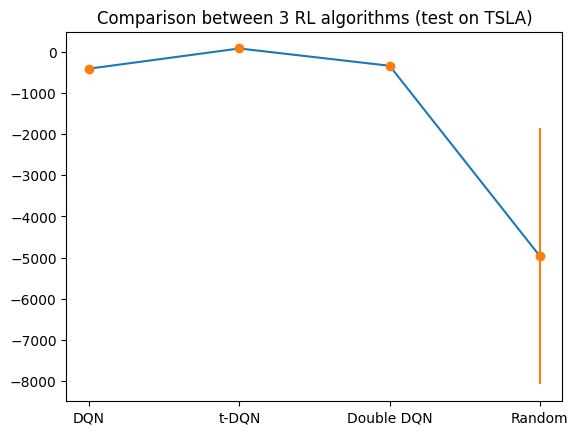

In [57]:
plot(
    ['DQN', 't-DQN', 'Double DQN', 'Random'],
    [-407.6066880000003, 83.97006600000003, -336.7500529999985, np.mean(TSLA_randoms)],
    [0, 0, 0, np.std(TSLA_randoms)],
    "Comparison between 3 RL algorithms (test on TSLA)"
)

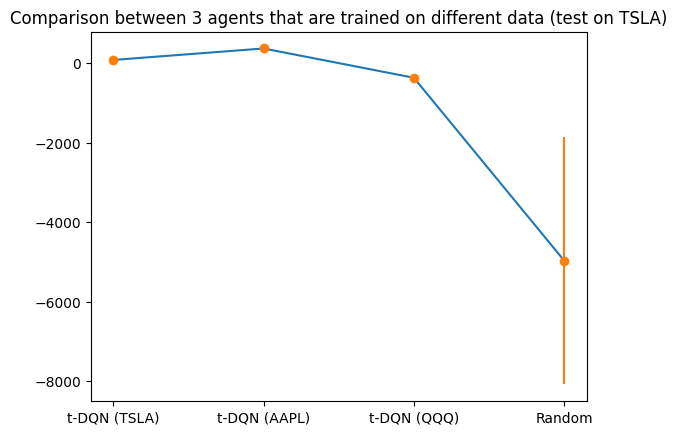

In [53]:
"""TSLA
1. 30 TSLA dqn-TSLA -407.6066880000003
2. 30 TSLA t-dqn-TSLA 83.97006600000003
3. 10 TSLA double-dqn-TSLA -336.7500529999985
4. 50 TSLA t-dqn-AAPL 373.1366349999993
5. 50 TSLA t-dqn-QQQ -363.70002099999977"""
plot(
    ['t-DQN (TSLA)', 't-DQN (AAPL)', 't-DQN (QQQ)', 'Random'],
    [83.97006600000003, 373.1366349999993, -363.70002099999977, np.mean(TSLA_randoms)],
    [0, 0, 0, np.std(TSLA_randoms)],
    "Comparison between 3 agents that are trained on different data (test on TSLA)"
)

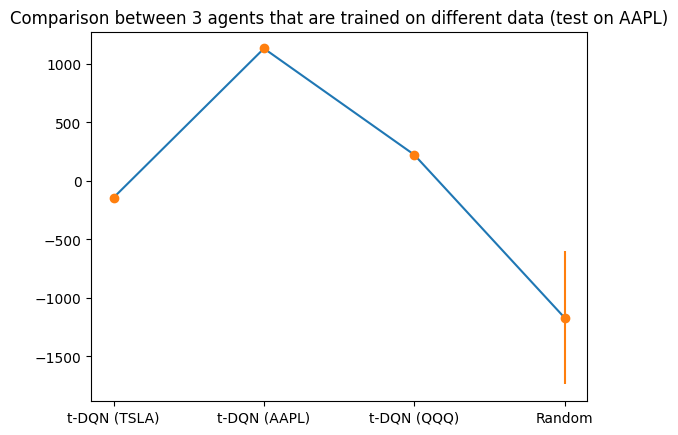

In [56]:
plot(
    ['t-DQN (TSLA)', 't-DQN (AAPL)', 't-DQN (QQQ)', 'Random'],
    [-141.72960599999996, 1132.2992560000007, 223.63701199999863, np.mean(AAPL_randoms)],
    [0, 0, 0, np.std(AAPL_randoms)],
    "Comparison between 3 agents that are trained on different data (test on AAPL)"
)

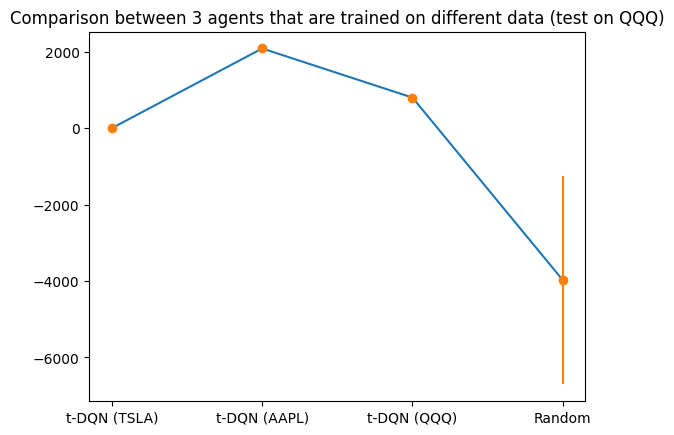

In [55]:
plot(
    ['t-DQN (TSLA)', 't-DQN (AAPL)', 't-DQN (QQQ)', 'Random'],
    [3.389739000000361, 2089.2887640000035, 802.8413460000033, np.mean(QQQ_randoms)],
    [0, 0, 0, np.std(QQQ_randoms)],
    "Comparison between 3 agents that are trained on different data (test on QQQ)"
)